In [5]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.linear_model import LinearRegression, QuantileRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
df_train = pl.read_parquet(".../scratch/ml_weather_forecasting/training_data/blend_training_data.parquet")
df_test = pl.read_parquet(".../scratch/ml_weather_forecasting/training_data/blend_test_data.parquet")

df_test

valid_time,aifs_t2m,ifs_t2m,gfs_t2m,obs_t2m
datetime[μs],f64,f64,f64,f64
2025-03-04 12:00:00,9.696339,9.332709,9.247523,10.0
2025-03-04 13:00:00,9.221788,9.810175,10.101912,10.7
2025-03-04 14:00:00,8.747236,10.287641,10.563547,12.5
2025-03-04 15:00:00,8.272685,10.765107,10.765302,12.7
2025-03-04 16:00:00,7.798133,8.971636,10.261397,12.8
…,…,…,…,…
2025-03-07 07:00:00,9.489611,8.767947,9.911931,10.1
2025-03-07 08:00:00,10.227838,9.556475,9.461604,10.7
2025-03-07 09:00:00,10.966064,10.345004,9.6038333,10.9


In [7]:
model = LinearRegression(fit_intercept=True)

X_train = df_train.select(["aifs_t2m", "ifs_t2m", "gfs_t2m"])
y_train = df_train.select(["obs_t2m"])

X_test = df_test.select(["aifs_t2m", "ifs_t2m", "gfs_t2m"])
y_test = df_test.select(["obs_t2m"])

model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[[0.27350593 0.64200981 0.86168605]] [-4.46319552]


In [8]:
# Blended model

df_train = df_train.with_columns(blend_t2m=np.squeeze(model.predict(X_train)))
df_train

valid_time,aifs_t2m,ifs_t2m,gfs_t2m,obs_t2m,blend_t2m
datetime[μs],f64,f64,f64,f64,f64
2025-03-01 12:00:00,7.719033,7.705037,7.760141,7.2,9.28152
2025-03-01 13:00:00,7.319483,8.021451,8.279585,8.6,9.82298
2025-03-01 14:00:00,6.919933,8.337866,8.49166,9.0,10.099584
2025-03-01 15:00:00,6.520383,8.65428,8.398172,9.5,10.112888
2025-03-01 16:00:00,6.120832,7.020314,8.0819833,9.4,8.682131
…,…,…,…,…,…
2025-03-04 07:00:00,0.998986,-0.293333,1.09126,-5.9,-3.437966
2025-03-04 08:00:00,2.568854,1.394313,2.905447,-1.5,-0.361853
2025-03-04 09:00:00,4.138722,3.08196,4.919862,1.3,2.886794


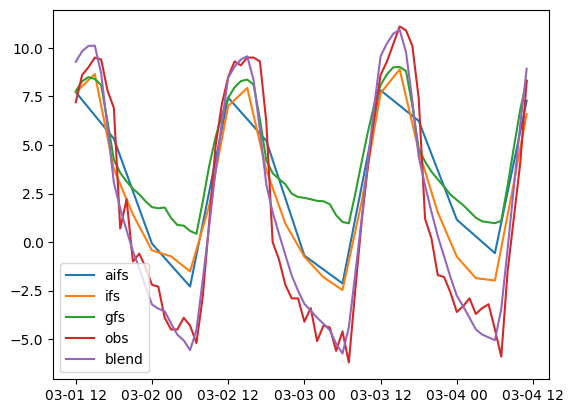

In [9]:
fig = plt.figure()

plt.plot(df_train["valid_time"], df_train["aifs_t2m"], label="aifs")
plt.plot(df_train["valid_time"], df_train["ifs_t2m"], label="ifs")
plt.plot(df_train["valid_time"], df_train["gfs_t2m"], label='gfs')
plt.plot(df_train["valid_time"], df_train["obs_t2m"], label="obs")
plt.plot(df_train["valid_time"], df_train["blend_t2m"], label="blend")

plt.legend()

In [10]:
for name in ["aifs_t2m","ifs_t2m","gfs_t2m","blend_t2m"]:
    print(f"{name}: {mean_absolute_error(y_true=df_train["obs_t2m"], y_pred=df_train[name])}")

aifs_t2m: 2.9417245596469903
ifs_t2m: 2.308868439369222
gfs_t2m: 3.5123895764496518
blend_t2m: 1.0917580330997447


Apply linear model to test data

In [11]:
# Blended model

df_test = df_test.with_columns(blend_t2m=np.squeeze(model.predict(X_test)))
df_test

valid_time,aifs_t2m,ifs_t2m,gfs_t2m,obs_t2m,blend_t2m
datetime[μs],f64,f64,f64,f64,f64
2025-03-04 12:00:00,9.696339,9.332709,9.247523,10.0,12.148963
2025-03-04 13:00:00,9.221788,9.810175,10.101912,10.7,13.061923
2025-03-04 14:00:00,8.747236,10.287641,10.563547,12.5,13.636453
2025-03-04 15:00:00,8.272685,10.765107,10.765302,12.7,13.987048
2025-03-04 16:00:00,7.798133,8.971636,10.261397,12.8,12.271621
…,…,…,…,…,…
2025-03-07 07:00:00,9.489611,8.767947,9.911931,10.1,12.30235
2025-03-07 08:00:00,10.227838,9.556475,9.461604,10.7,12.622462
2025-03-07 09:00:00,10.966064,10.345004,9.6038333,10.9,13.453171


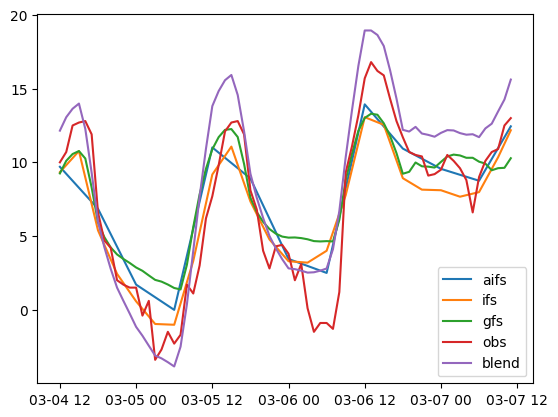

In [12]:
fig = plt.figure()

plt.plot(df_test["valid_time"], df_test["aifs_t2m"], label="aifs")
plt.plot(df_test["valid_time"], df_test["ifs_t2m"], label="ifs")
plt.plot(df_test["valid_time"], df_test["gfs_t2m"], label='gfs')
plt.plot(df_test["valid_time"], df_test["obs_t2m"], label="obs")
plt.plot(df_test["valid_time"], df_test["blend_t2m"], label="blend")

plt.legend()

In [13]:
for name in ["aifs_t2m","ifs_t2m","gfs_t2m","blend_t2m"]:
    print(f"{name}: {mean_absolute_error(y_true=df_test["obs_t2m"], y_pred=df_test[name])}")

# model doesn't do well with the test data as the lead time is too short, it doesn't seem to capture the overall trend, especially where there's a big change in the weather conditions (looks like a front came through here!!!)

aifs_t2m: 1.9159650414713525
ifs_t2m: 1.8478919643124188
gfs_t2m: 2.1308609559027776
blend_t2m: 2.188303000884161


## Quantile Regressor

In [67]:
quantiles = [0.1, 0.5, 0.9]

models = {}
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.25).fit(X_train, np.squeeze(y_train.to_numpy()))
    models[q] = qr

models

{0.1: QuantileRegressor(alpha=0.25, quantile=0.1),
 0.5: QuantileRegressor(alpha=0.25),
 0.9: QuantileRegressor(alpha=0.25, quantile=0.9)}

In [68]:
models[0.9].coef_

array([0.5656912 , 1.01343997, 0.        ])

In [69]:
predictions = {}

for q in quantiles:
    predictions[f"q{int(q*100)}"] = models[q].predict(X_test)

df_test = df_test.with_columns(**predictions)
df_test

valid_time,aifs_t2m,ifs_t2m,gfs_t2m,obs_t2m,blend_t2m,q10,q50,q90
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64
2025-03-04 12:00:00,9.696339,9.332709,9.247523,10.0,12.148963,7.782095,11.304675,14.048054
2025-03-04 13:00:00,9.221788,9.810175,10.101912,10.7,13.061923,8.351955,12.126218,14.263488
2025-03-04 14:00:00,8.747236,10.287641,10.563547,12.5,13.636453,8.921815,12.835984,14.478922
2025-03-04 15:00:00,8.272685,10.765107,10.765302,12.7,13.987048,9.491675,13.471787,14.694356
2025-03-04 16:00:00,7.798133,8.971636,10.261397,12.8,12.271621,7.351152,11.155837,12.608331
…,…,…,…,…,…,…,…,…
2025-03-07 07:00:00,9.489611,8.767947,9.911931,10.1,12.30235,7.108047,10.809638,13.358759
2025-03-07 08:00:00,10.227838,9.556475,9.461604,10.7,12.622462,8.049163,11.636664,14.575493
2025-03-07 09:00:00,10.966064,10.345004,9.6038333,10.9,13.453171,8.990278,12.632333,15.792227


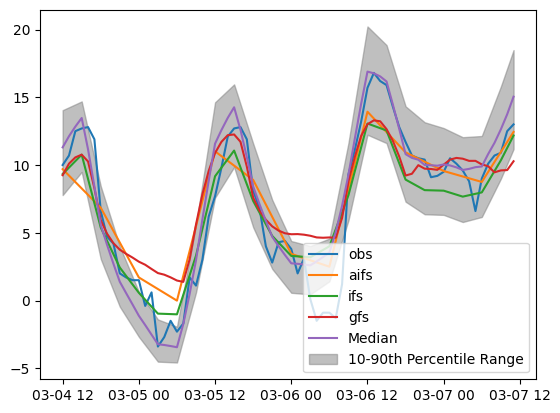

In [70]:
fig = plt.figure()

plt.plot(df_test["valid_time"], df_test["obs_t2m"], label="obs")
plt.plot(df_test["valid_time"], df_test["aifs_t2m"], label="aifs")
plt.plot(df_test["valid_time"], df_test["ifs_t2m"], label="ifs")
plt.plot(df_test["valid_time"], df_test["gfs_t2m"], label='gfs')
plt.plot(df_test["valid_time"], df_test["q50"], label="Median")
plt.fill_between(df_test["valid_time"], df_test["q10"], df_test["q90"], color='gray', alpha=0.5, label="10-90th Percentile Range")

plt.legend()

In [ ]:
for name in ["aifs_t2m","ifs_t2m","gfs_t2m","q50"]:
    print(f"{name}: {mean_absolute_error(y_true=df_test["obs_t2m"], y_pred=df_test[name])}")

# Quantile regression seemed slightly better than the straight linear regression when alpha=0, we've found the sweet spot is alpha=0.25


aifs_t2m: 1.9159650414713525
ifs_t2m: 1.8478919643124188
gfs_t2m: 2.1308609559027776
q50: 1.423433197271974
